In [2]:
import pandas as pd
import os

In [3]:
# Correcting relative path by going one level up
file_path = os.path.join(os.getcwd(), "..", "DataSet", "healthinsurance.csv")

# Normalize path (useful for cross-platform compatibility)
file_path = os.path.normpath(file_path)

# Check if file exists
if os.path.exists(file_path):
    print("File found")
    df = pd.read_csv(file_path)
else:
    print("File not found!")


File found


In [4]:
#display sample of 15
df.sample(15)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
2615,27.0,female,55,23.6,NoDisease,1,0,Fresno,87,1,1,Student,16709.8
1719,28.0,male,93,23.8,NoDisease,2,0,SanJose,70,1,0,Politician,3847.7
11259,61.0,female,66,44.0,NoDisease,0,0,Waterloo,58,0,0,HouseKeeper,13063.9
11151,27.0,male,70,32.6,NoDisease,3,0,SanJose,80,1,0,Analyst,4846.9
14071,51.0,male,93,NaN,NoDisease,1,0,Mandan,74,0,0,Actor,9377.9
3348,24.0,female,50,27.6,NoDisease,0,0,Waterloo,70,1,0,Photographer,18955.2
11160,33.0,female,79,35.5,HeartDisease,0,1,Hartford,50,1,0,DefencePersonnels,55135.4
6163,43.0,female,79,46.2,Diabetes,0,1,SantaRosa,110,1,0,Dancer,45863.2
10384,33.0,female,56,28.3,NoDisease,1,0,Louisville,56,1,0,Lawyer,4779.6
12671,61.0,female,78,21.1,NoDisease,0,0,FallsCity,82,1,1,FilmMaker,13415.0


In [5]:
#get data types
print(df.dtypes)

# for each float give me the range of values
print(df.describe())




age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object
                age        weight           bmi  no_of_dependents  \
count  14604.000000  15000.000000  14044.000000      15000.000000   
mean      39.547521     64.909600     30.266413          1.129733   
std       14.015966     13.701935      6.122950          1.228469   
min       18.000000     34.000000     16.000000          0.000000   
25%       27.000000     54.000000     25.700000          0.000000   
50%       40.000000     63.000000     29.400000          1.000000   
75%       52.000000     76.000000     34.400000          2.000000   
max       64.000000     95.0000

In [6]:
# Amount of rows with missing data
missing_data = df.isnull().sum()

print(missing_data)

# Drop rows with missing data
df = df.dropna()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64


In [7]:
# create sub dataset without hereditary_diseases, city and job_title
df2 = df.drop(columns=['hereditary_diseases', 'city', 'job_title'])

# print every binary column:
for column in df2.columns:
    if df2[column].nunique() == 2:
        print(column) 

#Convert sex to binary
df2['sex'] = df2['sex'].astype('category').cat.codes

print(df.sample(2))
print(df2.sample(2))




sex
smoker
diabetes
regular_ex
       age   sex  weight   bmi hereditary_diseases  no_of_dependents  smoker  \
1495  58.0  male      74  32.0           NoDisease                 1       0   
9642  45.0  male      51  28.7           NoDisease                 2       0   

              city  bloodpressure  diabetes  regular_ex   job_title    claim  
1495       Kingman             86         1           0        Chef  11946.6  
9642  WashingtonDC             72         1           0  Accountant   8028.0  
        age  sex  weight   bmi  no_of_dependents  smoker  bloodpressure  \
1006   43.0    0      60  25.1                 0       0             74   
10027  21.0    0      48  32.7                 2       0             84   

       diabetes  regular_ex    claim  
1006          1           0   7325.1  
10027         1           0  26019.0  


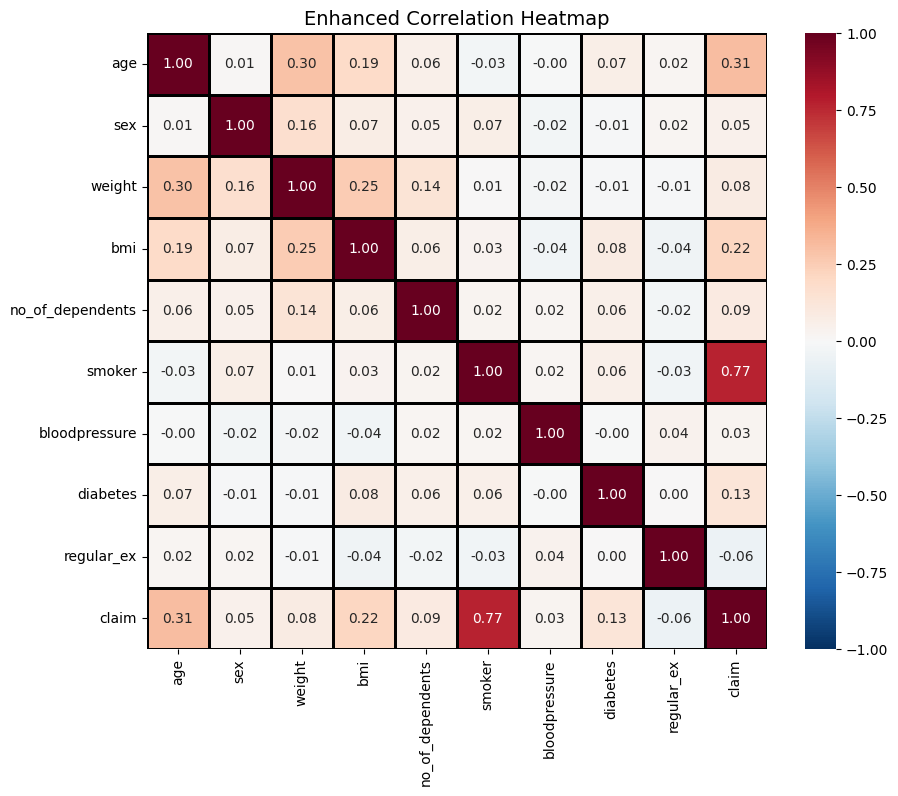

In [8]:
# display correlation plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Increase figure size
sns.heatmap(
    df2.corr(),
    annot=True, 
    fmt=".2f",  # Limit decimal places
    cmap="RdBu_r",  # Diverging colormap for better contrast
    center=0, 
    linewidths=1,  # Add grid lines
    linecolor="black",  # Grid color
    vmin=-1, vmax=1,  # Fixed scale for consistency
    annot_kws={"size": 10}  # Increase annotation font size
)
plt.title("Enhanced Correlation Heatmap", fontsize=14)  # Add title
plt.show()


In [9]:
# Real Life Comparison: Is the data set balanced?
print(df2.mean())

#get weight for man and weight female
print(df.groupby('sex')['weight'].mean())


age                    39.586533
sex                     0.487104
weight                 64.689478
bmi                    30.287295
no_of_dependents        1.106462
smoker                  0.198124
bloodpressure          68.628737
diabetes                0.783118
regular_ex              0.223110
claim               13416.465050
dtype: float64
sex
female    62.506143
male      66.988418
Name: weight, dtype: float64


## Real Life Comparison: 

### Cont. Variables:
Age: 38.6 

Weight Male: 89.7 kg

Weight Female: 77.4 kg 

BMI: 29 

Bloodpressure: 70-80 

claim: 14,570

### Cat. Variables
Sex: 50.5% male 

Smoker: 11.6% 

Diabetes: 11.6%

Reg. exercise: 24.2%




## Create ML ready datasets

### One Hot Encoded (OHE)

In [10]:
# create deepcopy of df

df_OHE = df.copy(deep=True)

#one hot encoding   
df_OHE = pd.get_dummies(df, columns=['hereditary_diseases', 'city', 'job_title'])
df_OHE['sex'] = df_OHE['sex'].astype('category').cat.codes

df_OHE = df_OHE.astype(int)

#display sample of 15
print(df_OHE.sample(5))

print(len(df_OHE.columns))
print(len(df.columns))

#save to folder DataSet/RegressionData
df_OHE.to_csv('../DataSet/RegressionData/healthinsurance_OHE.csv', index=False)


       age  sex  weight  bmi  no_of_dependents  smoker  bloodpressure  \
10117   54    0      89   23                 3       0             64   
14678   55    1      67   32                 0       0              0   
9985    44    0      55   27                 0       0             66   
9252    34    1      72   42                 2       0             72   
10246   49    1      76   28                 3       0             46   

       diabetes  regular_ex  claim  ...  job_title_Journalist  \
10117         1           0  12094  ...                     0   
14678         1           0  10601  ...                     0   
9985          0           0   7421  ...                     0   
9252          1           0   5124  ...                     0   
10246         1           0  10264  ...                     0   

       job_title_Labourer  job_title_Lawyer  job_title_Manager  \
10117                   0                 0                  0   
14678                   0             

### Label Encoding (LE)

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle

# Create a deep copy of the original DataFrame
df_LE = df.copy(deep=True)

# List of categorical columns to encode
categorical_cols = ['hereditary_diseases', 'city', 'job_title', 'sex']

# Dictionary to store a separate encoder for each categorical column
encoders = {}

# Apply label encoding for each categorical column individually
for col in categorical_cols:
    encoder = LabelEncoder()          # Create a new encoder for this column
    df_LE[col] = encoder.fit_transform(df_LE[col])
    encoders[col] = encoder           # Store the encoder in the dictionary

# Convert all columns to int (if necessary)
df_LE = df_LE.astype(int)

# Display a sample of the encoded DataFrame
print(df_LE.sample(5))

# Compare the number of columns
print("Number of columns (encoded):", len(df_LE.columns))
print("Number of columns (original):", len(df.columns))

# Save the encoded DataFrame to CSV
df_LE.to_csv('../DataSet/RegressionData/healthinsurance_LE.csv', index=False)

# Save the dictionary of encoders to a file
with open('../Models/encoder_dict.pkl', 'wb') as file:
    pickle.dump(encoders, file)


       age  sex  weight  bmi  hereditary_diseases  no_of_dependents  smoker  \
13436   18    1      50   28                    8                 0       0   
4372    45    0      53   27                    8                 2       0   
4170    25    0      45   24                    8                 3       0   
615     53    0      86   28                    8                 3       0   
13231   47    0      73   45                    8                 1       0   

       city  bloodpressure  diabetes  regular_ex  job_title  claim  
13436    13             84         1           1         22   1712  
4372     57             52         1           0          6   8515  
4170     30             60         0           0         22   4391  
615      84             90         1           0         21  11741  
13231    43             56         1           0         14   8569  
Number of columns (encoded): 13
Number of columns (original): 13
